<a href="https://colab.research.google.com/github/afintchtr/daming-spam-email/blob/main/TA_Daming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.7.13


In [ ]:
import timeit
import pylab
import numpy as np
import pandas as pd
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import normaltest
from scipy.stats import jarque_bera

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.under_sampling import RandomUnderSampler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('dataset_44_spambase-origin.csv')

## EKSPLORASI DATA (EDA)

In [ ]:
df.info()

In [ ]:
df.describe()

,id,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,2301.000000,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,1328.338624,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1151.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,2301.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,3451.000000,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4601.000000,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [ ]:
idx = df.columns

Text(0.5, 1.0, 'Fitur ke-55')

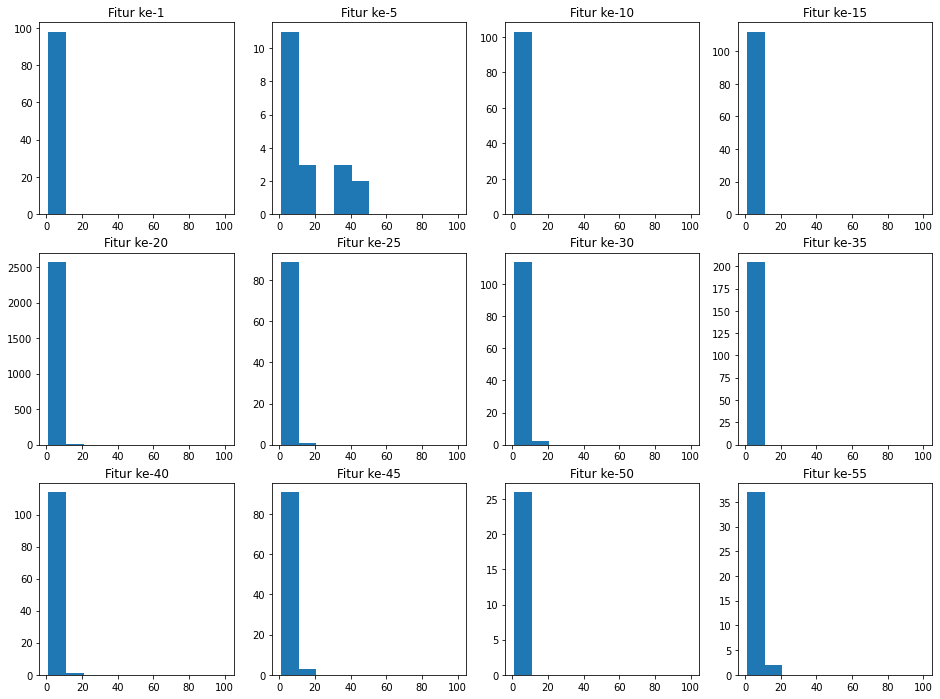

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(16,12))
axs[0, 0].hist(df[idx[1]], range=(1,100))
axs[0, 0].set_title('Fitur ke-1')

axs[0, 1].hist(df[idx[4]], range=(1,100))
axs[0, 1].set_title('Fitur ke-5')

axs[0, 2].hist(df[idx[9]], range=(1,100))
axs[0, 2].set_title('Fitur ke-10')

axs[0, 3].hist(df[idx[14]], range=(1,100))
axs[0, 3].set_title('Fitur ke-15')

axs[1, 0].hist(df[idx[19]], range=(1,100))
axs[1, 0].set_title('Fitur ke-20')

axs[1, 1].hist(df[idx[24]], range=(1,100))
axs[1, 1].set_title('Fitur ke-25')

axs[1, 2].hist(df[idx[29]], range=(1,100))
axs[1, 2].set_title('Fitur ke-30')

axs[1, 3].hist(df[idx[37]], range=(1,100))
axs[1, 3].set_title('Fitur ke-35')

axs[2, 0].hist(df[idx[39]], range=(1,100))
axs[2, 0].set_title('Fitur ke-40')

axs[2, 1].hist(df[idx[44]], range=(1,100))
axs[2, 1].set_title('Fitur ke-45')

axs[2, 2].hist(df[idx[49]], range=(1,100))
axs[2, 2].set_title('Fitur ke-50')

axs[2, 3].hist(df[idx[54]], range=(1,100))
axs[2, 3].set_title('Fitur ke-55')

In [ ]:
# fig, axs = plt.subplots(1, 3, figsize=(16,5))
# d1 = df[idx[55]]
# d2 = df[idx[56]]
# d3 = df[idx[57]]

# # Plot a histogram of the observed data
# #  Included is expected distribution, if the data is normally distributed, with the same mean and std of the data. 
# xs = np.arange(d1.min(), d1.max(), 0.1)
# fit = stats.norm.pdf(xs, np.mean(d1), np.std(d1))

# # axs[0, 0].plot(xs, fit, label='Normal Dist.', lw=3)
# axs[0, 0].hist(d1, 50, density=True, label='Actual Data');
# axs[0, 0].set_title('Fitur ke-56')
# axs[0, 0].legend();

# # axs[0, 1].plot(xs, fit, label='Normal Dist.', lw=3)
# # axs[0, 1].hist(d2, 50, density=True, label='Actual Data');
# # axs[0, 1].set_title('Fitur ke-57')
# # axs[0, 1].legend();

# # axs[0, 2].plot(xs, fit, label='Normal Dist.', lw=3)
# # axs[0, 2].hist(d3, 50, density=True, label='Actual Data');
# # axs[0, 2].set_title('Fitur ke-58')
# # axs[0, 2].legend();

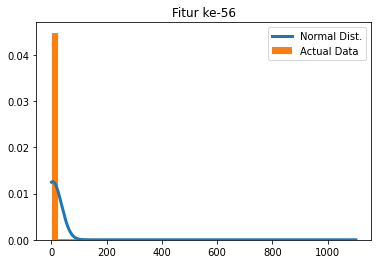

In [ ]:
d1 = df[idx[55]]

# Plot a histogram of the observed data
#  Included is expected distribution, if the data is normally distributed, with the same mean and std of the data. 
xs = np.arange(d1.min(), d1.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(d1), np.std(d1))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(d1, 50, density=True, label='Actual Data');
plt.title('Fitur ke-56')
plt.legend();

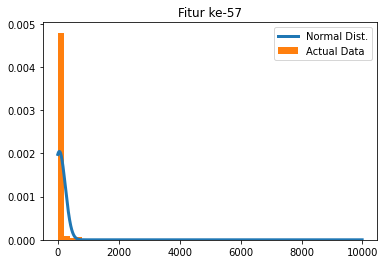

In [ ]:
d1 = df[idx[56]]

# Plot a histogram of the observed data
#  Included is expected distribution, if the data is normally distributed, with the same mean and std of the data. 
xs = np.arange(d1.min(), d1.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(d1), np.std(d1))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(d1, 50, density=True, label='Actual Data');
plt.title('Fitur ke-57')
plt.legend();

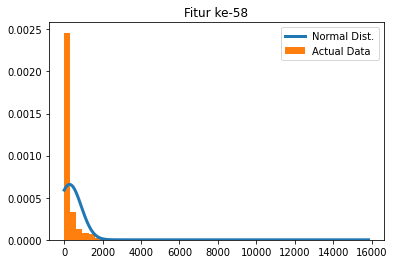

In [ ]:
d1 = df[idx[57]]

# Plot a histogram of the observed data
#  Included is expected distribution, if the data is normally distributed, with the same mean and std of the data. 
xs = np.arange(d1.min(), d1.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(d1), np.std(d1))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(d1, 50, density=True, label='Actual Data');
plt.title('Fitur ke-58')
plt.legend();

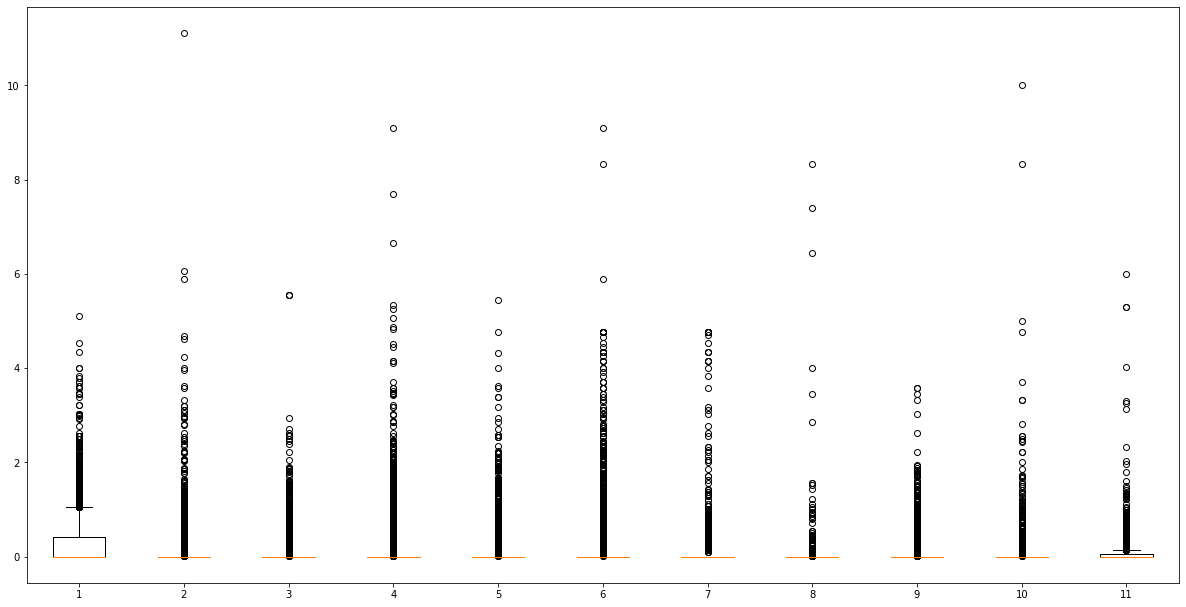

In [ ]:
data_1 = df[idx[3]]
data_2 = df[idx[8]]
data_3 = df[idx[13]]
data_4 = df[idx[18]]
data_5 = df[idx[23]]
data_6 = df[idx[28]]
data_7 = df[idx[32]]
data_8 = df[idx[38]]
data_9 = df[idx[43]]
data_10 = df[idx[48]]
data_11 = df[idx[53]]
data = [data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8, data_9, data_10, data_11]
 
fig = plt.figure(figsize =(16, 8))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

## PRA PROSES DATA

### Null Check, Transformasi Nama Kolom, Penentuan Data Target
Cek, apakah ada data yang kosong? 
Selanjutnya mengubah nama setiap kolom dengan menghapus simbol \'', lalu membagi jenis atribut menjadi 2 bagian, yakni prediktor dan target.
Pada tahap ini juga dilakukan menghapus kolom 'id'

In [ ]:
df.shape
print(df.isnull().values.any())
print(np.any(np.isnan(df)))
print(np.all(np.isfinite(df)))

False
False
True


In [ ]:
df.columns.to_list()

['id',
 'word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_%3B',
 'char_freq_%28',
 'char_

In [ ]:
df.columns = df.columns.str.replace('\'', '')
df.columns

In [ ]:
df["class"].value_counts()

In [ ]:
X = df.drop(["id", "class"], axis=1)
y = df["class"]

### Normalisasi
Mengubah nilai setiap atribut menjadi rentang 0 - 1

In [ ]:
# NORMALISASI 0-1
scaler = preprocessing.MinMaxScaler()
cols = X.columns
d = scaler.fit_transform(X)

X_scaled = pd.DataFrame(d, columns=cols)
X_scaled.head()

### Feature Selection
Menggunakan SelectKBest dengan F-skor dan Matriks Korelasi

In [ ]:
# Membuat model seleksi fitur menggunakan F Score
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_scaled, y)

# Iterasi skor keseluruhan fitur
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
 
# Plot skor
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
# Membuat daftar fitur yang terseleksi berdasarkan nilai threshold
selected_features = []

# Nilai threshold yang digunakan adalah mean dari seluruh F-skor atribut
threshold = np.mean(fs.scores_)
for i in range(len(fs.scores_)):
  if fs.scores_[i] >= threshold:
    print('Feature %d: %f' % (i, fs.scores_[i]))
    selected_features.append(X_scaled.columns[i])

threshold
selected_features
len(selected_features)

In [ ]:
X_fs = X_scaled[selected_features]
X_fs.head()

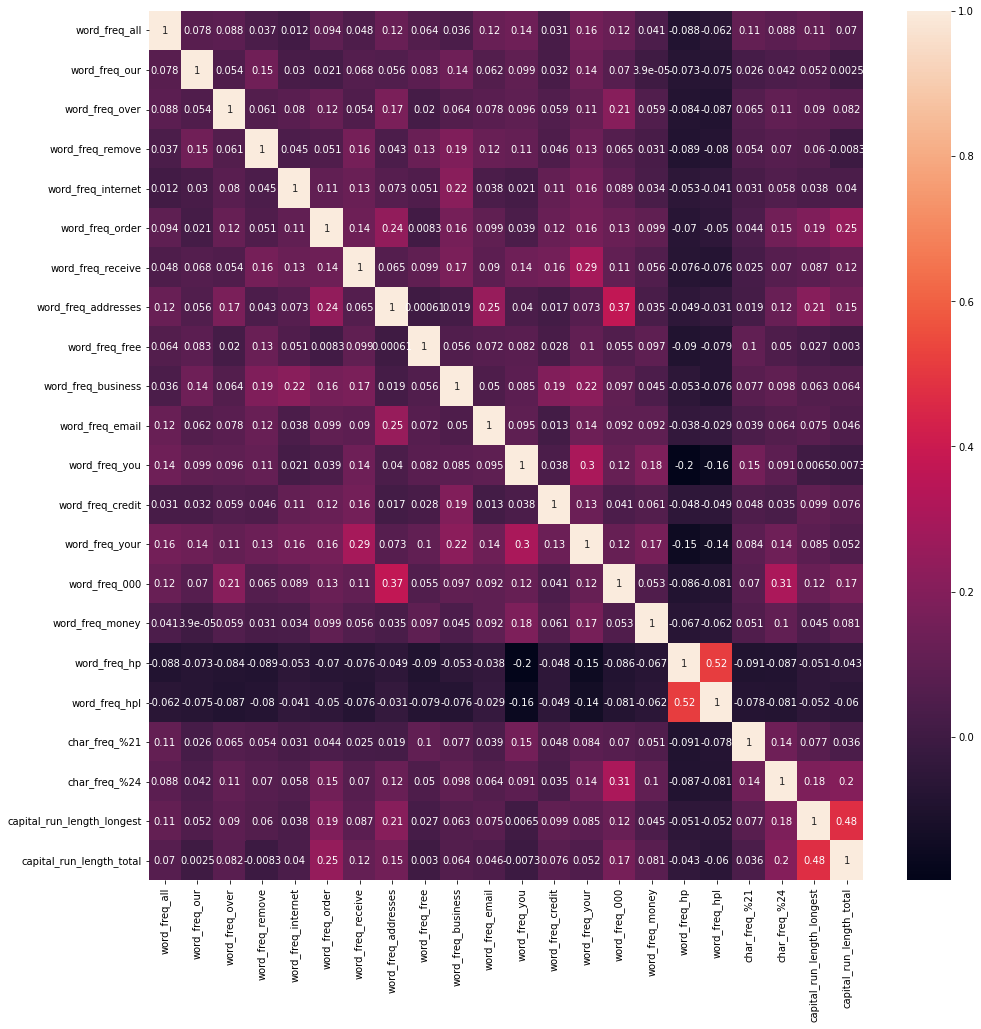

In [ ]:
# Matriks korelasi berdasarkan fitur yang telah terseleksi

corrMatrix = X_fs.corr()
fig, ax = plt.subplots(figsize=(16,16))  
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
# Membuang salah satu atribut yang memiliki niali korelasi tinggi dengan atribut lainnya

X_fs2 = X_fs.drop(['word_freq_hpl'], axis=1)
X_fs2.head()
X_fs2.columns.values.tolist()
len(X_fs2.columns.values.tolist())

21

### PCA
Mereduksi dimensi dari kumpulan atribut "Word Frequency"

In [ ]:
# Membuat model PCA dari yang semula 17 atribut menjadi 6 atribut
X_wordfreq = X_fs2.drop(['char_freq_%21', 'char_freq_%24', 'capital_run_length_total', 'capital_run_length_longest'], axis=1)
pca_wordfreq = PCA(n_components=6)
principalComponents_wordfreq = pca_wordfreq.fit_transform(X_wordfreq)

X_partial_pca = pd.DataFrame(data = principalComponents_wordfreq
             , columns = ['pca_attr1', 'pca_attr2', 'pca_attr3', 'pca_attr4', 'pca_attr5', 'pca_attr6'])
pca_wordfreq.explained_variance_ratio_

array([0.22820989, 0.12190528, 0.0979048 , 0.07938667, 0.07366572,
       0.06506755])

In [ ]:
# Menggabungkan dataframe hasil PCA dengan dataframe yang tidak terlibat proses PCA
X_rest = X_fs2[['char_freq_%21', 'char_freq_%24', 'capital_run_length_total', 'capital_run_length_longest']]
X_final = pd.concat([X_partial_pca, X_rest], axis=1)

### Partisi Data
Membuat Data Train dan Data Test secara proporsional

In [ ]:
# PARTISI DATA SECARA SEIMBANG untuk 10 Atribut (within PCA)
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, train_size=0.8, random_state=22)
for train_idx, test_idx in stratSplit.split(X_final, y):
  X_train, X_test = X_final.iloc[train_idx], X_final.iloc[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]

y_train.value_counts()
y_test.value_counts()

In [ ]:
# PARTISI DATA SECARA SEIMBANG untuk 22 Atribut (without PCA)
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, train_size=0.8, random_state=22)
for train_idx, test_idx in stratSplit.split(X_fs, y):
  X_train_2, X_test_2 = X_fs.iloc[train_idx], X_fs.iloc[test_idx]
  y_train_2, y_test_2 = y[train_idx], y[test_idx]

y_train_2.value_counts()
y_test_2.value_counts()

In [ ]:
# PARTISI DATA SECARA SEIMBANG untuk 57 Atribut (without any Feature Selection)
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, train_size=0.8, random_state=22)
for train_idx, test_idx in stratSplit.split(X, y):
  X_train_3, X_test_3 = X.iloc[train_idx], X.iloc[test_idx]
  y_train_3, y_test_3 = y[train_idx], y[test_idx]

y_train_3.value_counts()
y_test_3.value_counts()

### Undersampling
Melakukan Resampling agar frekuensi kelas target menjadi seimbang

In [ ]:
data = {'Non-Spam Email':y_train.value_counts()[0], 'Spam Email':y_train.value_counts()[1]} 
email_class = list(data.keys()) 
email_values = list(data.values()) 
   

fig = plt.figure(figsize = (5, 5)) 
  
# creating the bar plot 
plt.bar(email_class, email_values, color =['orange', 'skyblue'],  
        width = 0.8) 
  
plt.xlabel("Jenis Email") 
plt.ylabel("Jumlah") 
plt.title("Sebelum Undersampling") 
plt.show() 


In [ ]:
# UNDERSAMPLING DATA TRAIN untuk 10 Atribut (within PCA)
rus = RandomUnderSampler(random_state=22)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# y_train_resampled.value_counts()

In [ ]:
# UNDERSAMPLING DATA TRAIN untuk 22 Atribut (without PCA)
rus = RandomUnderSampler(random_state=22)
X_train_resampled_2, y_train_resampled_2 = rus.fit_resample(X_train_2, y_train_2)

y_train_resampled_2.value_counts()

In [ ]:
# UNDERSAMPLING DATA TRAIN untuk 22 Atribut (without PCA)
rus = RandomUnderSampler(random_state=22)
X_train_resampled_3, y_train_resampled_3 = rus.fit_resample(X_train_3, y_train_3)

y_train_resampled_3.value_counts()

In [ ]:
data_2 = {'Non-Spam Email':y_train_resampled.value_counts()[0], 'Spam Email':y_train_resampled.value_counts()[1]} 
email_class = list(data_2.keys()) 
email_values = list(data_2.values()) 
   

fig = plt.figure(figsize = (5, 5)) 
  
# creating the bar plot 
plt.bar(email_class, email_values, color =['orange', 'skyblue'],  
        width = 0.8) 
  
plt.xlabel("Jenis Email") 
plt.ylabel("Jumlah") 
plt.title("Setelah Undersampling") 
plt.show() 

## MEMBANGUN MODEL

## Membangun Model Random Forest dengan 10 Atribut + Undersampling

In [ ]:
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(random_state=22)
param_grid = { 
    'n_estimators': [10, 20, 50, 100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6, 7, 8, 9, 10],
    'criterion' :['gini', 'entropy']
}

#Train the model using the training sets y_pred=clf.predict(X_test)
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10, error_score='raise')
CV_rfc.fit(X_train_resampled, y_train_resampled)
stop = timeit.default_timer()
print('Time: ', stop - start)

CV_rfc.best_params_


In [ ]:
clf_best=RandomForestClassifier(random_state=22, max_features='auto', n_estimators=300, max_depth=10, criterion='gini')
clf_best.fit(X_train_resampled, y_train_resampled)

# prediction on test set
y_pred=clf_best.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9174809989142236


In [ ]:
clf_best.estimators_

In [ ]:
clf_dectree = tree.DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=895331189)
clf_dectree.fit(X_train_resampled, y_train_resampled)
y_pred=clf_best.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9174809989142236


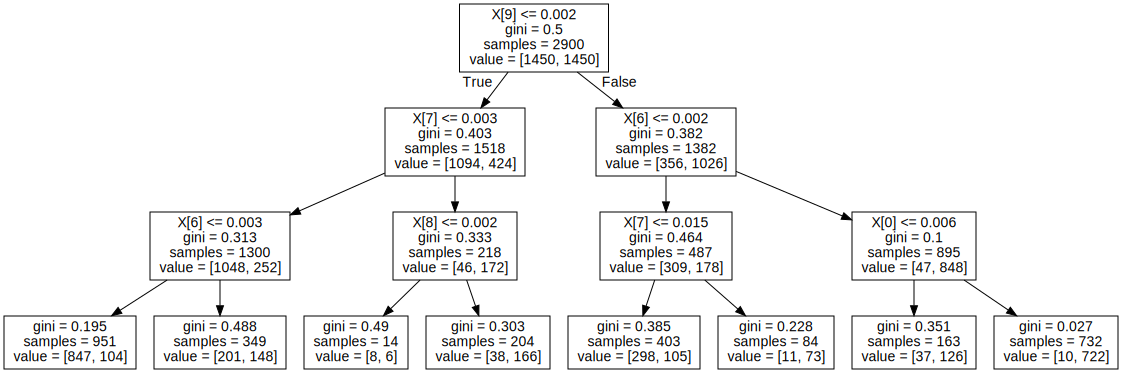

In [ ]:
dot_data = tree.export_graphviz(clf_dectree, out_file=None)
graph = graphviz.Source(dot_data)  
graph 

Text(0.5, 0, 'Random Forest Feature Importance')

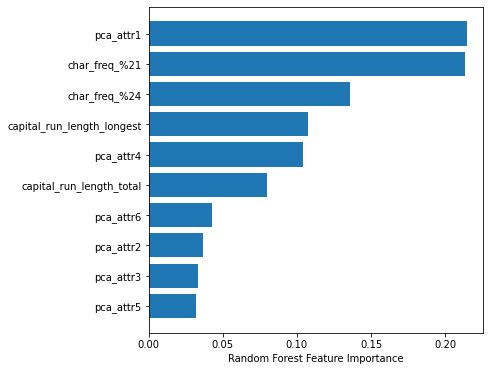

In [ ]:
sorted_idx = clf_best.feature_importances_.argsort()
fig = plt.figure(figsize = (6, 6)) 
plt.barh(X_train_resampled.columns[sorted_idx], clf_best.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix ');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
y_test.value_counts()

In [ ]:
target_names = ['Non-Spam Email', 'Spam Email']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
#define metrics
y_pred_proba = clf_best.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Membangun Model Random Forest dengan 22 Atribut (tanpa PCA)

In [ ]:
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(random_state=22)
param_grid_2 = { 
    'n_estimators': [10, 20, 50, 100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6, 7, 8, 9, 10],
    'criterion' :['gini', 'entropy']
}

#Train the model using the training sets y_pred=clf.predict(X_test)
CV_rfc_2 = GridSearchCV(estimator=clf, param_grid=param_grid_2, cv=10, error_score='raise')
CV_rfc_2.fit(X_train_resampled_2, y_train_resampled_2)
stop = timeit.default_timer()
print('Time: ', stop - start)


CV_rfc_2.best_params_

Time:  1028.5627791609995


{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 50}

In [ ]:
print(X_train_resampled_2.shape)
print(y_train_resampled_2.shape)
print(X_test_2.shape)
print(y_test_2.shape)

(2900, 22)
(2900,)
(921, 22)
(921,)


In [ ]:
clf_best_2=RandomForestClassifier(random_state=22, max_features='log2', n_estimators= 300, max_depth=10, criterion='entropy')
clf_best_2.fit(X_train_resampled_2, y_train_resampled_2)

# prediction on test set
y_pred_2=clf_best_2.predict(X_test_2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test_2, y_pred_2))

Accuracy: 0.9250814332247557


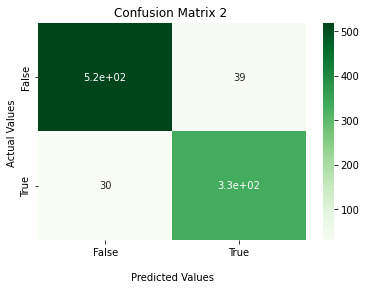

In [ ]:
cf_matrix_2 = confusion_matrix(y_test_2, y_pred_2)
ax = sns.heatmap(cf_matrix_2, annot=True, cmap='Greens')

ax.set_title('Confusion Matrix 2 ');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance without PCA')

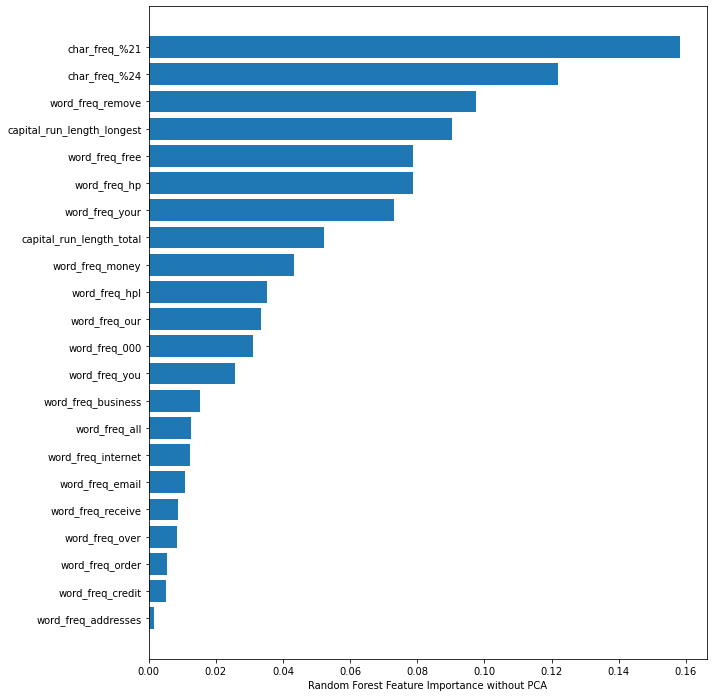

In [ ]:
sorted_idx_2 = clf_best_2.feature_importances_.argsort()
fig_2 = plt.figure(figsize = (10, 12)) 
plt.barh(X_train_resampled_2.columns[sorted_idx_2], clf_best_2.feature_importances_[sorted_idx_2])
plt.xlabel("Random Forest Feature Importance without PCA")

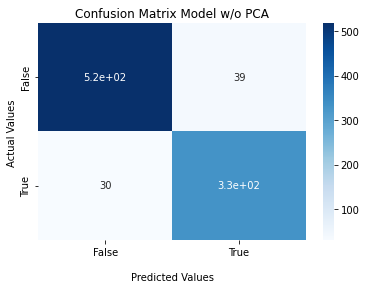

In [ ]:
cf_matrix_2 = confusion_matrix(y_test_2, y_pred_2)
ax_2 = sns.heatmap(cf_matrix_2, annot=True, cmap='Blues')

ax_2.set_title('Confusion Matrix Model w/o PCA');
ax_2.set_xlabel('\nPredicted Values')
ax_2.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax_2.xaxis.set_ticklabels(['False','True'])
ax_2.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
target_names = ['Non-Spam Email', 'Spam Email']
print(classification_report(y_test_2, y_pred_2, target_names=target_names))

                precision    recall  f1-score   support

Non-Spam Email       0.95      0.93      0.94       558
    Spam Email       0.90      0.92      0.91       363

      accuracy                           0.93       921
     macro avg       0.92      0.92      0.92       921
  weighted avg       0.93      0.93      0.93       921



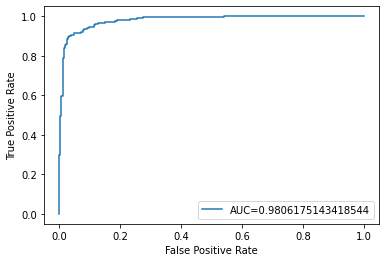

In [ ]:
#define metrics
y_pred_proba_2 = clf_best_2.predict_proba(X_test_2)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_2,  y_pred_proba_2)
auc = metrics.roc_auc_score(y_test_2, y_pred_proba_2)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Membangun Model dengan 57 Atribut (tanpa Feature Selection)

In [ ]:
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(random_state=22)
param_grid_3 = { 
    'n_estimators': [10, 20, 50, 100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6, 7, 8, 9, 10],
    'criterion' :['gini', 'entropy']
}

#Train the model using the training sets y_pred=clf.predict(X_test)
CV_rfc_3 = GridSearchCV(estimator=clf, param_grid=param_grid_3, cv=10, error_score='raise')
CV_rfc_3.fit(X_train_resampled_3, y_train_resampled_3)
stop = timeit.default_timer()
print('Time: ', stop - start)


CV_rfc_3.best_params_

Time:  1141.5962904770004


{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 300}

In [ ]:
clf_best_3=RandomForestClassifier(random_state=22, max_features='log2', n_estimators= 300, max_depth=10, criterion='entropy')
clf_best_3.fit(X_train_resampled_3, y_train_resampled_3)

# prediction on test set
y_pred_3=clf_best_3.predict(X_test_3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test_3, y_pred_3))

Accuracy: 0.9446254071661238


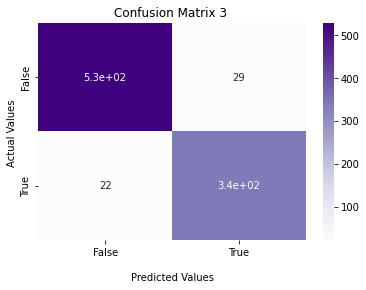

In [ ]:
cf_matrix_3 = confusion_matrix(y_test_3, y_pred_3)
ax = sns.heatmap(cf_matrix_3, annot=True, cmap='Purples')

ax.set_title('Confusion Matrix 3 ');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance without Any Feature Selection')

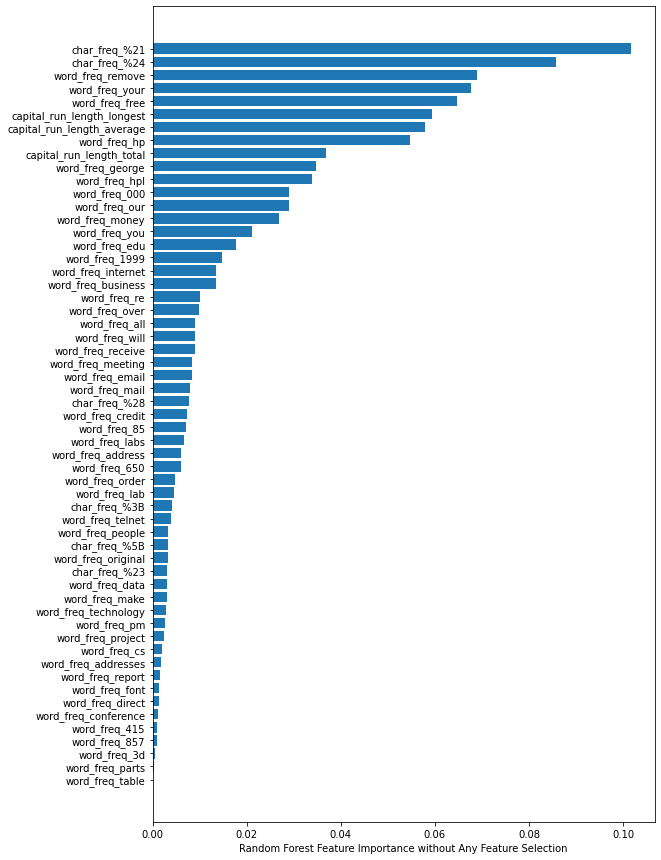

In [ ]:
sorted_idx_3 = clf_best_3.feature_importances_.argsort()
fig_3 = plt.figure(figsize = (9, 15)) 
plt.barh(X_train_resampled_3.columns[sorted_idx_3], clf_best_3.feature_importances_[sorted_idx_3])
plt.xlabel("Random Forest Feature Importance without Any Feature Selection")

In [ ]:
target_names = ['Non-Spam Email', 'Spam Email']
print(classification_report(y_test_2, y_pred_2, target_names=target_names))

                precision    recall  f1-score   support

Non-Spam Email       0.95      0.93      0.94       558
    Spam Email       0.90      0.92      0.91       363

      accuracy                           0.93       921
     macro avg       0.92      0.92      0.92       921
  weighted avg       0.93      0.93      0.93       921



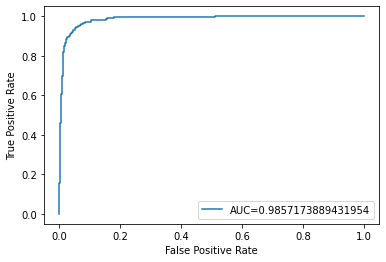

In [ ]:
#define metrics
y_pred_proba_3 = clf_best_3.predict_proba(X_test_3)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_3,  y_pred_proba_3)
auc = metrics.roc_auc_score(y_test_3, y_pred_proba_3)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## YUK COBA MODEL LAIN BANG

SVM bang

In [ ]:
from sklearn.svm import SVC

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.786 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.828 total time=   0.3s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.802 total time=   0.3s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.791 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.795 total time=   0.3s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.512 total time=   0.5s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.512 total time=   0.5s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.502 total time=   0.5s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.498 total time=   0.6s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.498 total time=   0.5s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.797 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rb

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1000, gamma=1)


In [ ]:
classifier = SVC(C = 1, gamma = 0.1, kernel = 'rbf', random_state = 22)
classifier.fit(X_train, y_train)

SVC(C=1, gamma=0.1, random_state=22)

In [ ]:
y_pred_SVM = classifier.predict(X_test)

In [ ]:
print("accuracy :", classifier.best_score_)

AttributeError: ignored

In [ ]:
cm = confusion_matrix(y_test, y_pred_SVM)

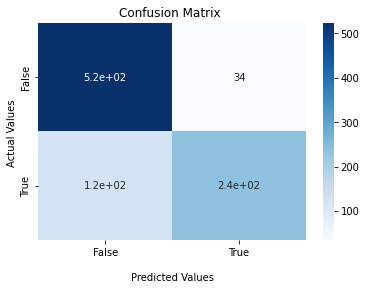

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_SVM)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix ');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
target_names = ['Non-Spam Email', 'Spam Email']
print(classification_report(y_test, y_pred_SVM, target_names=target_names))

                precision    recall  f1-score   support

Non-Spam Email       0.91      0.96      0.94       558
    Spam Email       0.94      0.86      0.90       363

      accuracy                           0.92       921
     macro avg       0.93      0.91      0.92       921
  weighted avg       0.92      0.92      0.92       921



Logreg bang

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train_resampled,X_train_resampled)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.358272
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                 2900
Model:                          Logit   Df Residuals:                     2890
Method:                           MLE   Df Model:                            9
Date:                Mon, 06 Jun 2022   Pseudo R-squ.:                  0.4831
Time:                        01:21:36   Log-Likelihood:                -1039.0
converged:                       True   LL-Null:                       -2010.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
pca_attr1                     19.6458      0.897     21.896      0.000      

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [ ]:
y_pred_LG = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_resampled, y_train_resampled)


In [ ]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.5f" % (results.mean()))

10-fold cross validation average accuracy: 0.85054


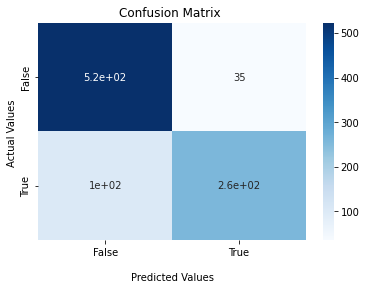

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_LG)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix ');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
target_names = ['Non-Spam Email', 'Spam Email']
print(classification_report(y_test, y_pred_LG, target_names=target_names))

                precision    recall  f1-score   support

Non-Spam Email       0.83      0.94      0.88       558
    Spam Email       0.88      0.71      0.79       363

      accuracy                           0.85       921
     macro avg       0.86      0.83      0.84       921
  weighted avg       0.85      0.85      0.85       921



In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85
